In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import os
import wget

In [4]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/Interpolacion.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Interpolacion.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [5]:
Data = pd.read_csv(Path_)
Data

,X,Y
0,5,10
1,10,15
2,15,25


In [23]:
X = np.float64(Data.X)
Y = np.float64(Data.Y)
print(X,Y)

[ 5. 10. 15.] [10. 15. 25.]


In [34]:
X = np.array([1,2,3,4,5])
Y = np.array([-3.4,-5.6,0,3,3.5])

In [35]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [36]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [37]:
x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

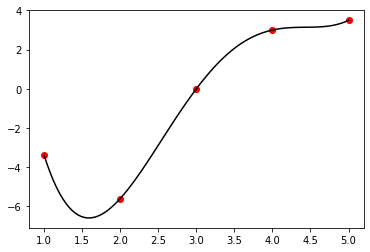

In [38]:
plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')

In [46]:
x = sym.Symbol('x',real=True)
x

x

In [47]:
f = Interpolate(x,X,Y)
f = sym.simplify(f)
f

0.4375*x**4 - 6.10833333333333*x**3 + 29.6125*x**2 - 54.8416666666667*x + 27.5

In [49]:
df = sym.diff(f,x)
df

1.75*x**3 - 18.325*x**2 + 59.225*x - 54.8416666666667

In [41]:
func = sym.lambdify([x],f,'numpy')

In [42]:
func(2.5)

-2.878906250000014

In [43]:
x = np.linspace(X[0],X[-1],100)
y = np.interp(x,X,Y)

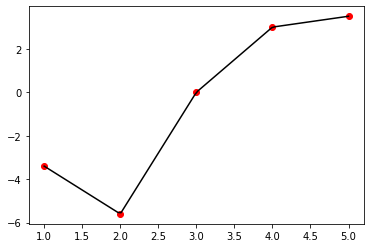

In [44]:
plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')